In [1]:
#importing the required packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from datetime import datetime

In [2]:
#setting the directory
os.chdir('C:/Users/aarad/OneDrive/Desktop/46927_85203_bundle_archive/')

In [3]:
#reading the given file
df = pd.read_csv('data.csv')

In [4]:
#shape of data
df.shape

(4600, 18)

In [5]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [6]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [7]:
#number of unique values for each variable
df.nunique(axis = 0)

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [8]:
#Country has only 1 value, so we can drop it
df = df.drop(['country'], axis = 1)

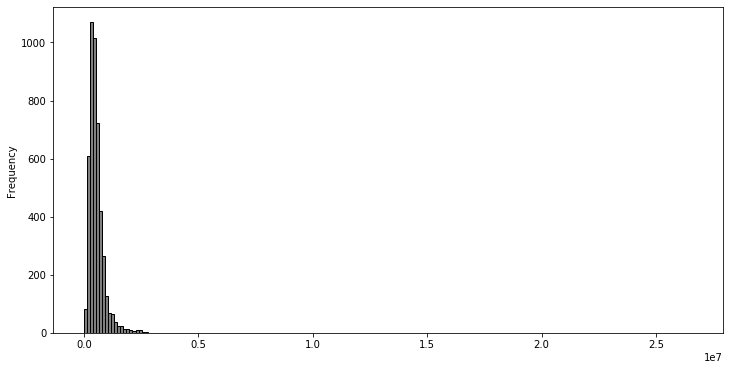

In [9]:
#looking at the price distribution of house
df['price'].plot(kind='hist', bins=200, figsize=(12,6), facecolor='grey',
                            edgecolor='black')

In [10]:
#For price maximum values lies between 0 to 0.5*10**7, few houses have price listed as zero
#finsing number of houses with zero prices
alpha = df[df.price == 0]
print(str(len(alpha)))

49


In [11]:
df.bedrooms.value_counts()

3.0    2032
4.0    1531
2.0     566
5.0     353
6.0      61
1.0      38
7.0      14
0.0       2
8.0       2
9.0       1
Name: bedrooms, dtype: int64

In [12]:
#getting count for each category
df.bathrooms.value_counts()

2.50    1189
1.00     743
1.75     629
2.00     427
2.25     419
1.50     291
2.75     276
3.00     167
3.50     162
3.25     136
3.75      37
4.50      29
4.00      23
4.25      23
0.75      17
4.75       7
5.00       6
5.50       4
5.25       4
1.25       3
6.25       2
0.00       2
8.00       1
6.50       1
5.75       1
6.75       1
Name: bathrooms, dtype: int64

In [13]:
#making a new dataframe considering the outliesrs
house = df[(df['price']>0) & (df['bedrooms']>0)]

In [14]:
house.shape
house.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


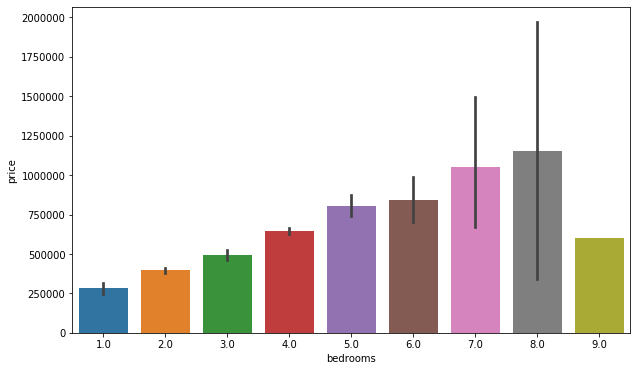

In [15]:
#plotting price distribution with respect to bedrooms
#using barplots
plt.figure(figsize = (10,6))
sns.barplot(x = house.bedrooms, y = house['price'])
house['6 or more'] = house['bedrooms']>=6

In [16]:
house['bedrooms'].replace([7,8,9],6, inplace = True)

D:\Anaconda\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


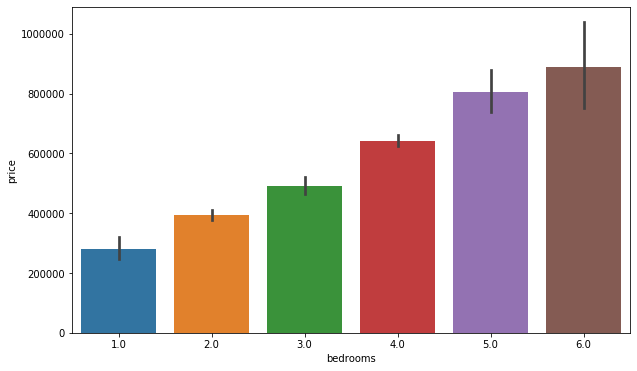

In [17]:
#plotting price distribution with respect to bedrooms
#using barplots
plt.figure(figsize = (10,6))
sns.barplot(x = house.bedrooms, y = house['price'])   

In [18]:
house['6 or more'].value_counts()

False    4473
True       76
Name: 6 or more, dtype: int64

In [19]:
house['6 or more'] = house.apply(
        lambda row: 1 if (row['6 or more']) else 0,
        axis=1
    )

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [20]:
house['6 or more'].value_counts()

0    4473
1      76
Name: 6 or more, dtype: int64

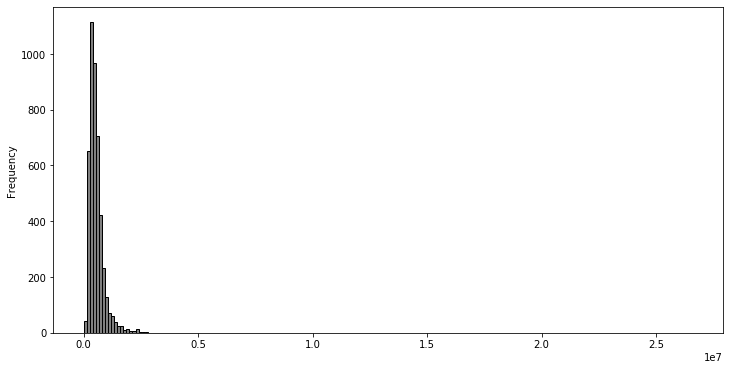

In [21]:
#looking at the price distribution of house
house['price'].plot(kind='hist', bins=200, figsize=(12,6), facecolor='grey',
                            edgecolor='black')

In [22]:
#we will convert year renovated into 0 and 1
house['renovated_age'] = house.apply(
    lambda row: (2014-row['yr_renovated']) if (row['yr_renovated']>0) else row['yr_renovated'],
    axis=1
)


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [23]:
house['age'] = 2014 - house['yr_built']

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


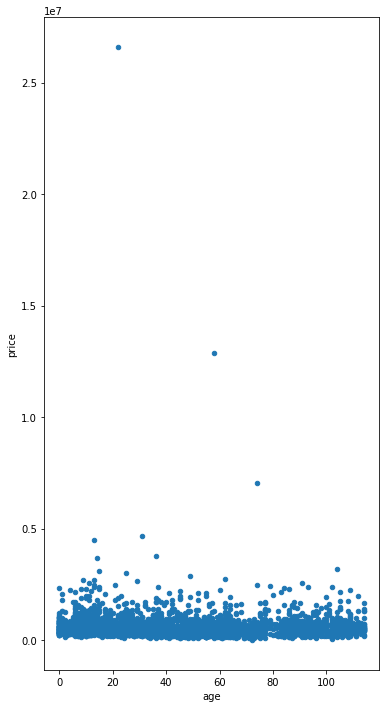

In [24]:
#There is no specific boundary for sqft_living there are numerous outliers
#visualising sqft living and price together (bivariate) for inference
house.plot(kind='scatter', x='age', y='price', figsize=(6,12))

In [25]:
#In order to deal with the outliers I am transforming price to natural logorithm
house['log_price'] = np.log(house['price'])

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


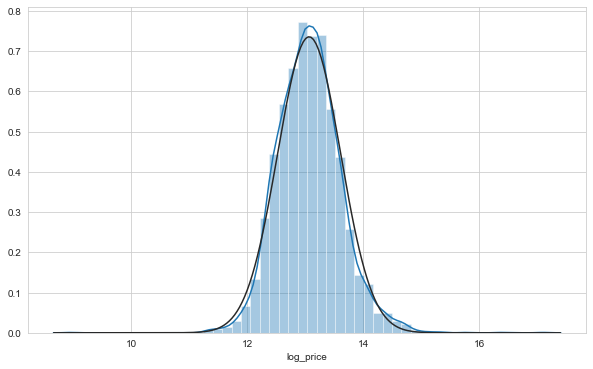

In [26]:
sns.set_style("whitegrid");
plt.figure(figsize = (10,6))
sns.distplot(house['log_price'], fit = norm)

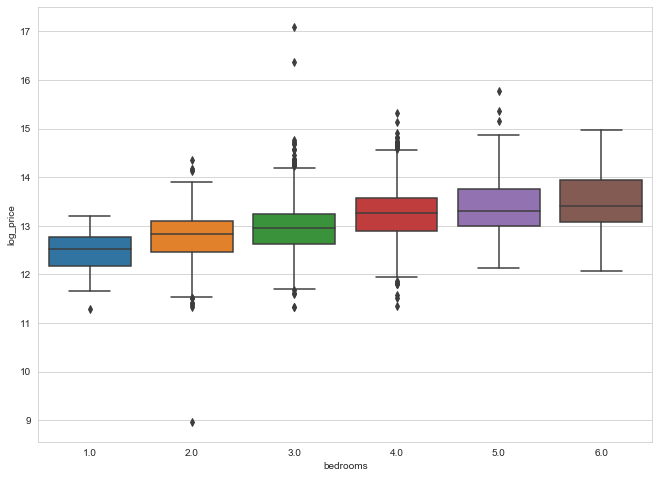

In [27]:
#a box plot to check for outliers
f, ax = plt.subplots(figsize=(11, 8))
box1 = sns.boxplot(x = 'bedrooms', y= 'log_price', data = house)

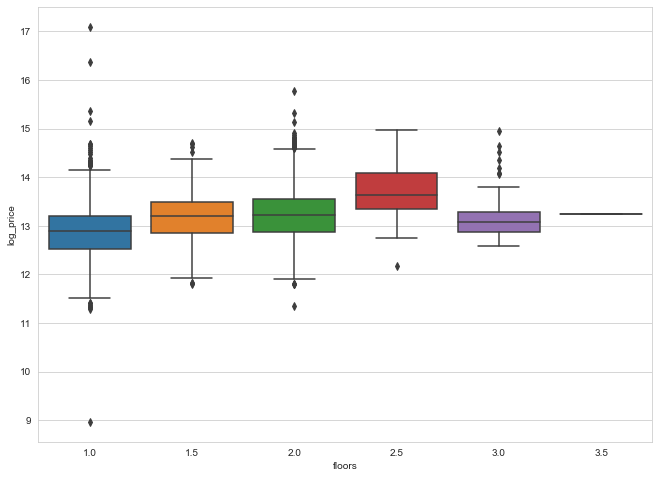

In [28]:
#a box plot to check for outliers
f, ax = plt.subplots(figsize=(11, 8))
box1 = sns.boxplot(x = 'floors', y= 'log_price', data = house)

In [29]:
house.loc[house['floors'] == 3.5]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,street,city,statezip,6 or more,renovated_age,age,log_price
3398,2014-06-25 00:00:00,563500.0,3.0,2.5,1400,1312,3.5,0,0,3,...,0,2007,0,3637 Phinney Ave N,Seattle,WA 98103,0,0,7,13.241923


In [30]:
house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,6 or more,renovated_age,age,log_price
count,4.549000e+03,4549.000000,4549.000000,4549.000000,4.549000e+03,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000
mean,5.576257e+05,3.391515,2.155968,2131.578809,1.483460e+04,1.511651,0.006595,0.234337,3.449549,1821.291932,310.286876,1970.787206,808.036272,0.016707,7.923719,43.212794,13.064556
std,5.638915e+05,0.884702,0.775205,955.234941,3.597114e+04,0.537794,0.080949,0.765085,0.675242,853.292493,462.043404,29.763891,979.313181,0.128185,16.634017,29.763891,0.542559
min,7.800000e+03,1.000000,0.750000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,8.961879
25%,3.261000e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,0.000000,0.000000,17.000000,12.694959
50%,4.650000e+05,3.000000,2.250000,1970.000000,7.680000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,0.000000,0.000000,38.000000,13.049793
75%,6.575000e+05,4.000000,2.500000,2610.000000,1.097000e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,600.000000,1997.000000,1999.000000,0.000000,11.000000,63.000000,13.396200
max,2.659000e+07,6.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000,1.000000,102.000000,114.000000,17.096046


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43],
 <a list of 44 Text xticklabel objects>)

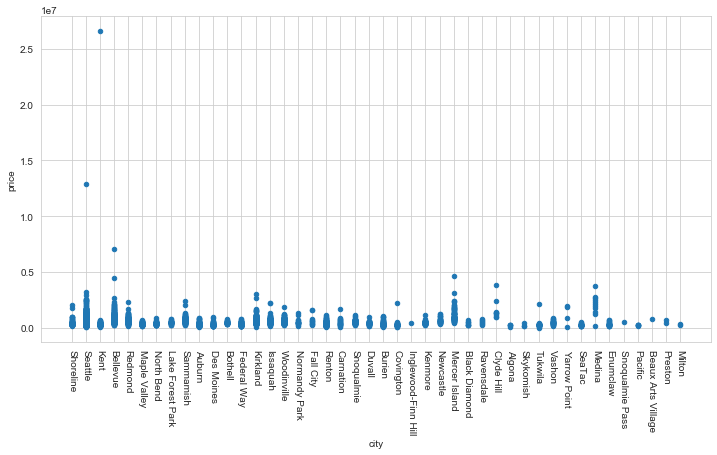

In [31]:
house.plot(kind='scatter', x='city', y='price', figsize=(12,6))
plt.xticks(rotation = -90)

In [32]:
house.loc[house['price'] > 2.5*10**7]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,street,city,statezip,6 or more,renovated_age,age,log_price
4350,2014-07-03 00:00:00,26590000.0,3.0,2.0,1180,7793,1.0,0,0,4,...,0,1992,0,12005 SE 219th Ct,Kent,WA 98031,0,0,22,17.096046


In [33]:
house.loc[house['street'] == '12005 SE 219th Ct']

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,street,city,statezip,6 or more,renovated_age,age,log_price
4350,2014-07-03 00:00:00,26590000.0,3.0,2.0,1180,7793,1.0,0,0,4,...,0,1992,0,12005 SE 219th Ct,Kent,WA 98031,0,0,22,17.096046


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43],
 <a list of 44 Text xticklabel objects>)

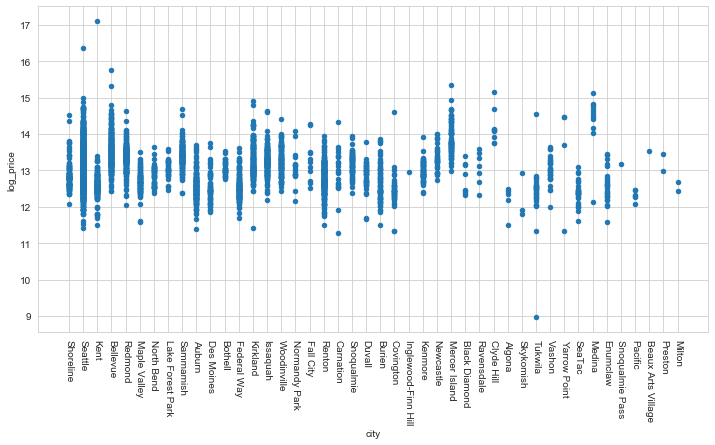

In [34]:
#only one entry for given street is there

house.plot(kind='scatter', x='city', y='log_price', figsize=(12,6))
plt.xticks(rotation = -90)

In [35]:
house.loc[house['log_price']<9.5]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,street,city,statezip,6 or more,renovated_age,age,log_price
4351,2014-05-06 00:00:00,7800.0,2.0,1.0,780,16344,1.0,0,0,1,...,0,1942,0,4229 S 144th St,Tukwila,WA 98168,0,0,72,8.961879


In [36]:
from scipy import stats

In [39]:
z = np.abs(stats.zscore(house['log_price']))
print(z)

[0.75686325 2.98569036 0.59353108 ... 0.22846936 1.55138758 1.40175299]


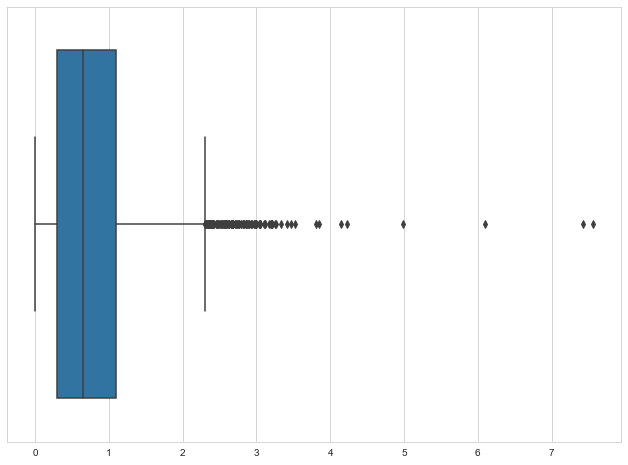

In [40]:
#a box plot to check for outliers
f, ax = plt.subplots(figsize=(11, 8))
box1 = sns.boxplot(x = z)

In [79]:
#extracting numerical values
house_num = house[['price','sqft_living','sqft_above',
                  'sqft_basement','log_price','age']]
Q1 = house_num.quantile(0.25)
Q3 = house_num.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

price            331400.000000
sqft_living        1150.000000
sqft_above         1110.000000
sqft_basement       600.000000
log_price             0.701241
age                  46.000000
dtype: float64


In [80]:
#The data point where we have False that means these values are valid whereas True indicates presence of an outlier
print((house_num < (Q1 - 1.5 * IQR)) |(house_num > (Q3 + 1.5 * IQR)))

      price  sqft_living  sqft_above  sqft_basement  log_price    age
0     False        False       False          False      False  False
1      True        False       False          False       True  False
2     False        False       False          False      False  False
3     False        False       False          False      False  False
4     False        False       False          False      False  False
...     ...          ...         ...            ...        ...    ...
4595  False        False       False          False      False  False
4596  False        False       False          False      False  False
4597  False        False       False          False      False  False
4598  False        False       False          False      False  False
4599  False        False       False          False      False  False

[4549 rows x 6 columns]


In [81]:
house_out = house[~((house_num < (Q1 - 1.5 * IQR)) |(house_num > (Q3 + 1.5 * IQR))).any(axis=1)]
house_out.shape

(4183, 21)

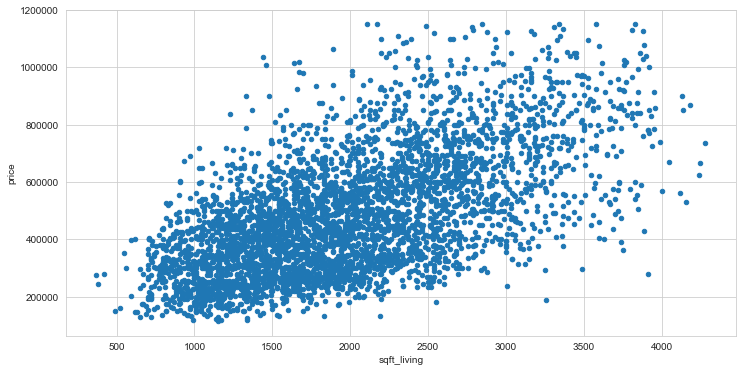

In [82]:
#visualising sqft living and price together (bivariate) for inference
house_out.plot(kind='scatter', x='sqft_living', y='price', figsize=(12,6))

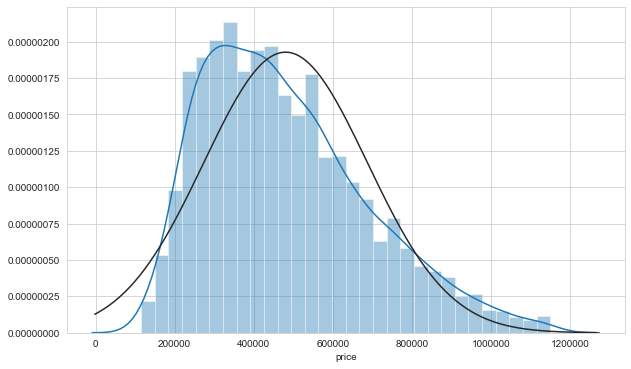

In [86]:
sns.set_style("whitegrid");
plt.figure(figsize = (10,6))
sns.distplot(house_out['price'], fit = norm)

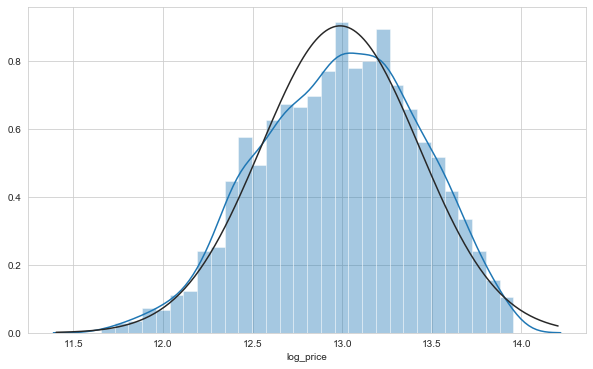

In [83]:
sns.set_style("whitegrid");
plt.figure(figsize = (10,6))
sns.distplot(house_out['log_price'], fit = norm)

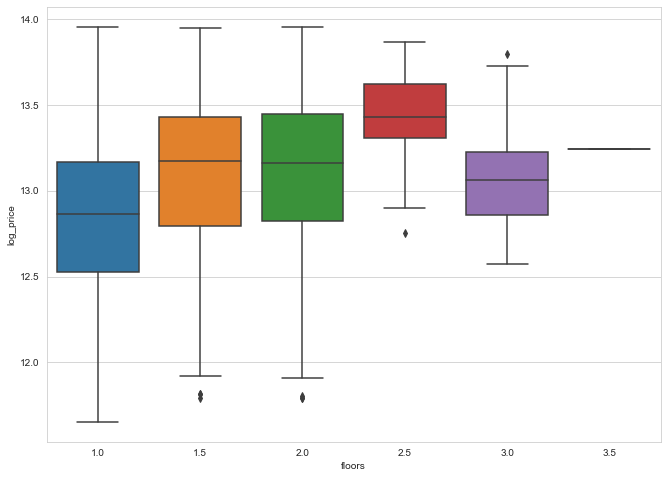

In [84]:
#a box plot to check for outliers
f, ax = plt.subplots(figsize=(11, 8))
box1 = sns.boxplot(x = 'floors', y= 'log_price', data = house_out)

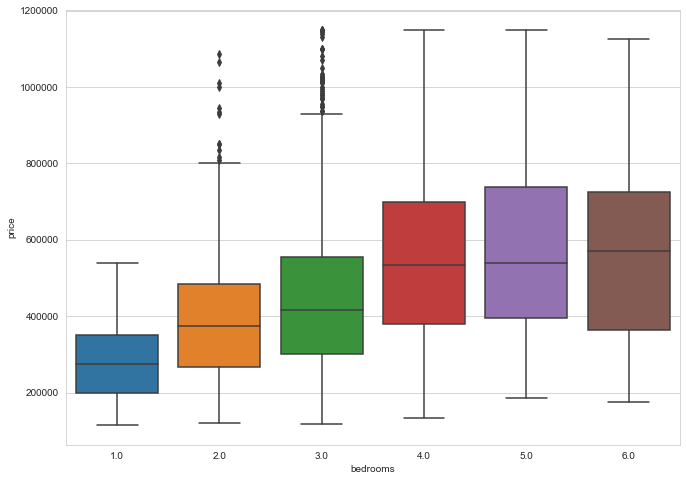

In [85]:
#a box plot to check for outliers
f, ax = plt.subplots(figsize=(11, 8))
box1 = sns.boxplot(x = 'bedrooms', y= 'price', data = house_out)

In [87]:
house_out['6 or more'] = house_out['bedrooms']>=6
house_out['6 or more'] = house_out.apply(
        lambda row: 1 if (row['6 or more']) else 0,
        axis=1
    )

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [88]:
house_out['6 or more'].value_counts()

0    4132
1      51
Name: 6 or more, dtype: int64

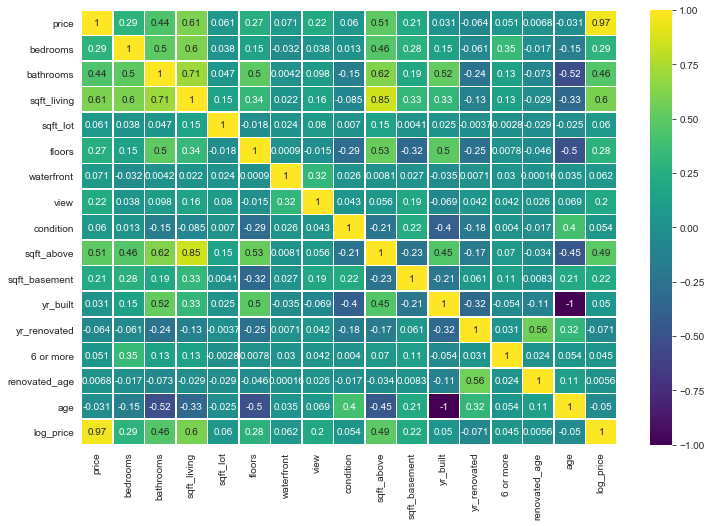

In [89]:
#plotting a heatmap to define correlation
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(house_out.corr(), annot = True, linewidths=.5, ax=ax, cmap = 'viridis')

In [90]:
house
house_out = house_out.drop(['price', 'yr_built','yr_renovated'], axis = 1)

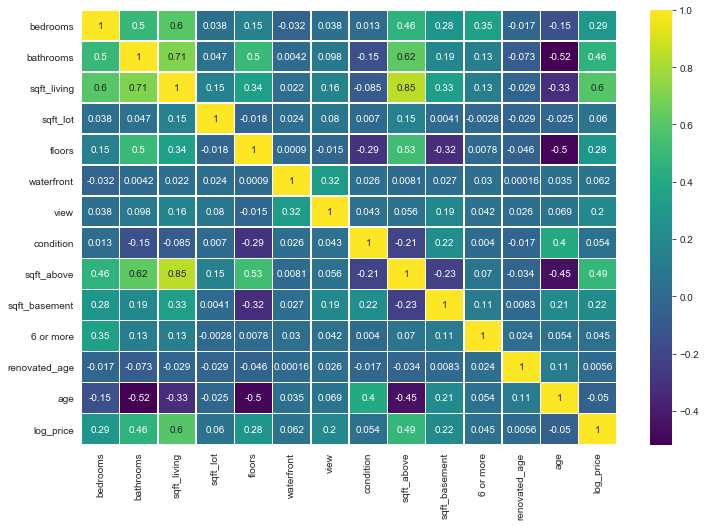

In [91]:
#plotting a heatmap to define correlation
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(house_out.corr(), annot = True, linewidths=.5, ax=ax, cmap = 'viridis')

In [92]:
#on basis of Z score
z = np.abs(stats.zscore(house_num))
print(z)

[[0.43386461 0.82876557 0.56410298 0.67162735 0.75686325 0.53047304]
 [3.23923179 1.58975353 1.81517866 0.06555706 2.98569036 1.6729224 ]
 [0.38243062 0.21104857 0.12741237 0.67162735 0.59353108 0.16085707]
 ...
 [0.24958165 0.91968763 1.39323708 0.67162735 0.22846936 1.28400535]
 [0.62824963 0.0435321  0.88055916 1.53620015 1.55138758 0.10795454]
 [0.59774395 0.67171887 0.388294   0.67162735 1.40175299 0.64557777]]


In [97]:
house_out_z = house[(z < 3).all(axis=1)]
house_out_z.shape

(4418, 21)

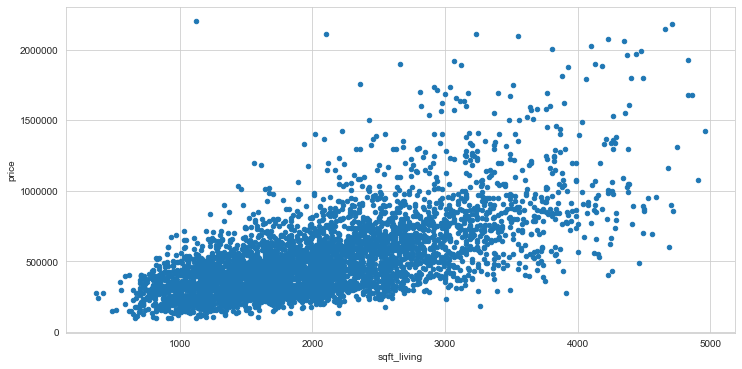

In [94]:
#visualising sqft living and price together (bivariate) for inference
house_out_z.plot(kind='scatter', x='sqft_living', y='price', figsize=(12,6))

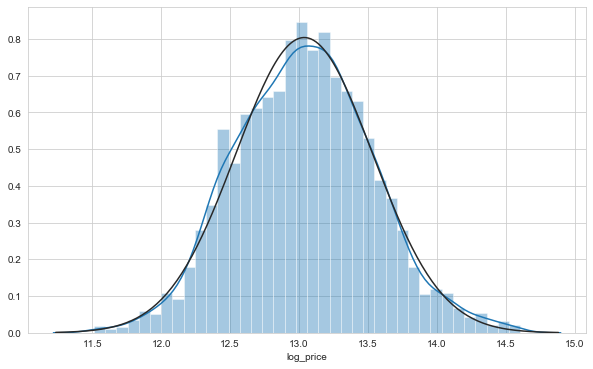

In [95]:
sns.set_style("whitegrid");
plt.figure(figsize = (10,6))
sns.distplot(house_out_z['log_price'], fit = norm)

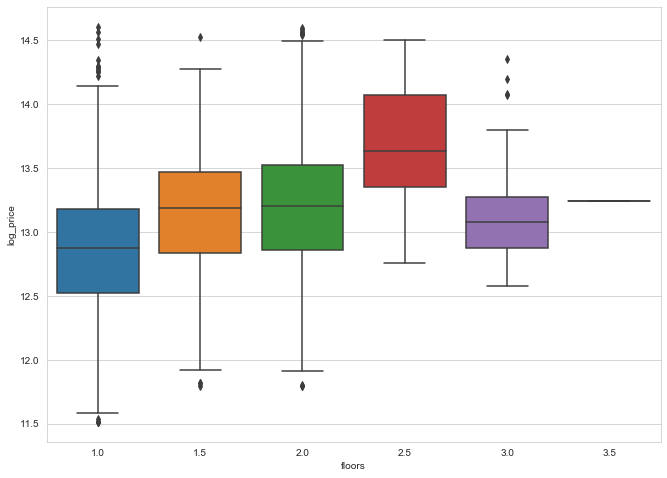

In [96]:
#a box plot to check for outliers
f, ax = plt.subplots(figsize=(11, 8))
box1 = sns.boxplot(x = 'floors', y= 'log_price', data = house_out_z)

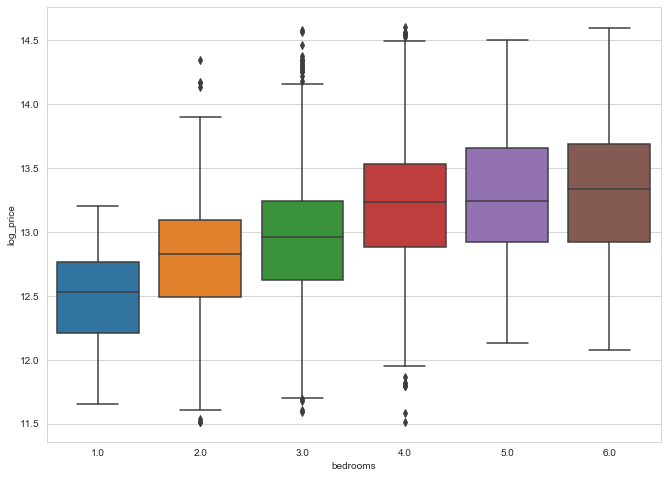

In [98]:
#a box plot to check for outliers
f, ax = plt.subplots(figsize=(11, 8))
box1 = sns.boxplot(x = 'bedrooms', y= 'log_price', data = house_out_z)

In [70]:
#Feature mearging
(house_out[['sqft_living', 'sqft_above']].corr()**2).sum().sum()/2

1.736098495801412

In [72]:
#both of these columns contain information worth 1.7 columns
#How to merge??

In [99]:
pd.get_dummies(house_out.street)

,1 View Ln NE,10 W Etruria St,100 20th Ave E,100 24th Ave E,100 Mt Si Pl NW,1000 Mountain View Blvd SE,10000-10026 S 100th St,10005 16th Ave S,10009 SE 247th Pl,1001 SW 102nd St,...,Eastridge Drive Promenade,Evergreen Way SE,Indian Trail,SE 170th Pl,Schmitz Park to Alki Trail,Shangri-La Way NW,Sunrise Loop Trail,Tolt Pipeline Trail,Trossachs Blvd SE,Valley View Trail
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4598,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
encoded = pd.get_dummies(house_out.street)

In [101]:
house_out = pd.concat([house_out, encoded], axis=1)

In [102]:
house_out.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,Eastridge Drive Promenade,Evergreen Way SE,Indian Trail,SE 170th Pl,Schmitz Park to Alki Trail,Shangri-La Way NW,Sunrise Loop Trail,Tolt Pipeline Trail,Trossachs Blvd SE,Valley View Trail
0,2014-05-02 00:00:00,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,0,0,0,0,0,0,0,0,0,0
2,2014-05-02 00:00:00,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,0,0,0,0,0,0,0,0,0,0
3,2014-05-02 00:00:00,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,0
4,2014-05-02 00:00:00,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,0,0,0,0,0,0,0,0,0,0
5,2014-05-02 00:00:00,2.0,1.00,880,6380,1.0,0,0,3,880,...,0,0,0,0,0,0,0,0,0,0
